# Import der benötigten Packages

In [1]:
import urllib.request
import pandas as pd

import matplotlib.pyplot as plt

# Import der Daten
Seattle Public Library   
"checkouts by title for physical and electronic items"  
monatliche Ausleihen seit April 2005  
Diese Datei enthält über 37 Mio Zeilen und 11 Spalten.  
Diese Größe ist beim Download unhandlich, daher lade ich einzelne Ausleihjahre mit "where=checkoutyear= ".  
Offenbar werden per default nur 1000 Einträge geladen, daher setze ich das Limit manuell hoch mit "limit=...".

In [2]:
# Festlegung der URL mit Eingrenzung des Ausleihjahres und der Anzahl von Zeilen
checkout_url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2020&$limit=2000000"
checkouts_file = "checkouts.csv"

In [3]:
# Download der Daten
urllib.request.urlretrieve(checkout_url, checkouts_file)

('checkouts.csv', <http.client.HTTPMessage at 0xc2014a8>)

In [4]:
# Überführung in ein Python-Objekt
checkouts = pd.read_csv(checkouts_file)

# Erster Blick auf die Daten

In [5]:
# Welche Spalten sind enthalten?
checkouts.columns

Index(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear',
       'checkoutmonth', 'checkouts', 'title', 'creator', 'subjects',
       'publisher', 'publicationyear'],
      dtype='object')

In [6]:
type(checkouts)

pandas.core.frame.DataFrame

In [7]:
# Anzahl der Einträge für das Ausleihjahr - erster Versuch - so erhält man leider keinen INT zurück:
print(checkouts.index)

RangeIndex(start=0, stop=1721376, step=1)


In [8]:
# Anzahl der Einträge für das Ausleihjahr - size liefert row x columns als float
int(checkouts.size / 11)

1721376

In [9]:
# Daten ansehen
checkouts

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2020,8,1,Harvest / Sam Inglis.,"Inglis, Sam",Young Neil 1945 Harvest,"Continuum,",2003.
1,Digital,OverDrive,EBOOK,2020,8,1,The Race Beat,Gene Roberts,"History, Nonfiction, Politics, Sociology","Random House, Inc.",2008
2,Digital,OverDrive,EBOOK,2020,8,5,I Can Cook Vegan,Isa Chandra Moskowitz,"Cooking & Food, Nonfiction",ABRAMS,2019
3,Digital,OverDrive,EBOOK,2020,8,1,Follow the Stars Home,Luanne Rice,"Fiction, Romance","Random House, Inc.",2012
4,Digital,OverDrive,EBOOK,2020,8,1,Blood of Innocence,Tami Dane,"Fantasy, Fiction, Romance",Lightning Source Inc,2012
...,...,...,...,...,...,...,...,...,...,...,...
1721371,Digital,OverDrive,EBOOK,2020,12,4,Blueberries for Sal,Robert McCloskey,"Juvenile Fiction, Juvenile Literature, Picture...","Penguin Group (USA), Inc.",2014
1721372,Physical,Horizon,BOOK,2020,12,1,Squad / Mariah MacCarthy.,"MacCarthy, Mariah","Cheerleading Juvenile fiction, Best friends Ju...","Farrar Straus Giroux,",2019.
1721373,Physical,Horizon,BOOK,2020,12,2,Out of this world : poems and facts about spac...,"Sklansky, Amy E.","Outer space Juvenile poetry, Outer space Juven...","Alfred A. Knopf,",[2012]
1721374,Physical,Horizon,BOOK,2020,12,5,"Ring shout : or, Hunting Ku Kluxes in the end ...","Clark, P. Djèlí","Ku Klux Klan 1915 Fiction, African Americans G...","Tordotcom,",2020.


# Analyse der Daten

In [10]:
%matplotlib inline

## 1) Wie verteilen sich die Ausleihen auf die unterschiedlichen Ausleihtypen?

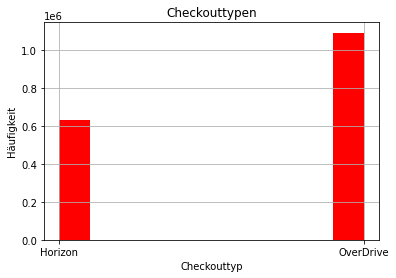

In [11]:
# Verteilung nach Checkouttypen
# Histogramm plotten
checkouts["checkouttype"].hist(color="red")
plt.title("Checkouttypen")
plt.xlabel("Checkouttyp")
plt.ylabel("Häufigkeit")
plt.show()

Es gibt nur zwei Checkouttypen: Horizon und Overdrive.

## 2) Wie ist das Verhältnis von digitalen und physischen Ausleihen?

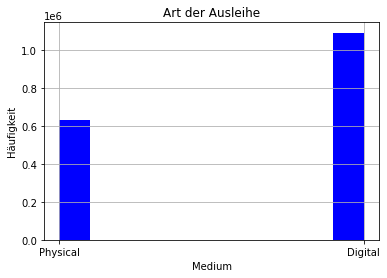

In [12]:
# Histogramm plotten
checkouts["usageclass"].hist(color="blue")
plt.title("Art der Ausleihe")
plt.xlabel("Medium")
plt.ylabel("Häufigkeit")
plt.show()

Wie lauten die genauen Zahlen der digitalen Ausleihen?

In [13]:
checkouts.usageclass.count()
# dies gibt offenbar die Gesamtzahl

1721376

In [14]:
type(checkouts["usageclass"])

pandas.core.series.Series

In [15]:
# Ausprobieren: Ansprechen über Index funktionert?
print(checkouts["usageclass"][3])

Digital


In [16]:
# count funktioniert nur für Listen:
checkouts["usageclass"].tolist().count("Digital")

1091407

In [17]:
# count funktioniert nur für Listen:
checkouts["usageclass"].tolist().count("Physical")

629969

In [18]:
# Anzahl als Variable
Anzahl_digital = checkouts["usageclass"].tolist().count("Digital")
Anzahl_digital

1091407

In [19]:
# Anzahl als Variable
Anzahl_physisch = checkouts["usageclass"].tolist().count("Physical")
Anzahl_physisch

629969

In [20]:
#Das gefällt mir noch nicht - ich möchte direkt beides haben für "Digital" und "physical"
mediatype = pd.Index(checkouts.usageclass)
mediatype_table = mediatype.value_counts()
print("Die Ausleihen verteilen sich folgendermaßen auf digitale und physische Ausleihen:")
print(mediatype_table)

Die Ausleihen verteilen sich folgendermaßen auf digitale und physische Ausleihen:
Digital     1091407
Physical     629969
Name: usageclass, dtype: int64


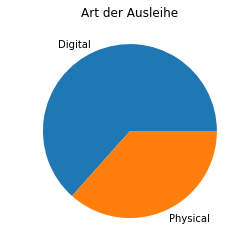

In [21]:
# Darstellung als Kreisdiagramm
mediatype_table.plot.pie()
plt.title("Art der Ausleihe")
plt.ylabel(" ")
plt.show()

In [22]:
# Verhältnis bestimmen:
ratio = str(int((Anzahl_digital/(Anzahl_digital+Anzahl_physisch))*100))
print("Es werden " + ratio + "% der Ausleihen digital getätigt.")

Es werden 63% der Ausleihen digital getätigt.


## 3) Entwicklung der digitalen Ausleihen über die Jahre
Wie hat sich der Anteil der Ausleihe in digitaler Form über die Jahre 2015-2020 entwickelt?    
Umsetzung: Die Werte für die einzelnen Ausleihjahre sollen über eine for-Schleife erzeugt werden.

**Schritte zur Vorbereitung:**

In [23]:
# Darstellung der URL mit Jahreszahl als Variablen, exemplarische Rechnung: Limit hier 1000  
jahr = 2015
checkout_url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=" +str(jahr) + "&$limit=1000"
print(checkout_url)

https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2015&$limit=1000


In [24]:
# Abfrage mehrerer Ausleihjahre über for-Schleife: 
# (eigentlich sollte xrange für Interation genutzt werden, aber dieser Befehl wird hier nicht erkannt, Fehler nicht gefunden)
for i in range(0, 6):
    jahr = 2015 + i
    print(jahr)

2015
2016
2017
2018
2019
2020


In [25]:
for i in range(0, 6):
    jahr = 2015 + i
    checkout_url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=" +str(jahr) + "&$limit=1000"
    print(checkout_url)

https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2015&$limit=1000
https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2016&$limit=1000
https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2017&$limit=1000
https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=1000
https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=1000
https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2020&$limit=1000


**Zusammensetzen zur endgültigen Schleife:**

In [26]:
for i in range(0, 6):
    jahr = 2015 + i
    checkout_url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=" +str(jahr) + "&$limit=1000"
    checkouts_file = "checkouts.csv"
    # Download der Daten
    urllib.request.urlretrieve(checkout_url, checkouts_file)
    # Überführung in ein Python-Objekt
    checkouts = pd.read_csv(checkouts_file)
    # Anzahl
    Anzahl_digital = checkouts["usageclass"].tolist().count("Digital")
    Anzahl_physisch = checkouts["usageclass"].tolist().count("Physical")
    # Verhältnis:
    ratio = int((Anzahl_digital/(Anzahl_digital+Anzahl_physisch))*100)
    print(jahr)
    print("Digital:" + str(Anzahl_digital))
    print("Physical:" + str(Anzahl_physisch))
    print("Anteil Digital:" + str(ratio) + "%")

2015
Digital:365
Physical:635
Anteil Digital:36%
2016
Digital:371
Physical:629
Anteil Digital:37%
2017
Digital:418
Physical:582
Anteil Digital:41%
2018
Digital:447
Physical:553
Anteil Digital:44%
2019
Digital:372
Physical:628
Anteil Digital:37%
2020
Digital:546
Physical:454
Anteil Digital:54%


**Ausgabe als Tabelle und Diagramm**

Die Plot-Funktionen in Pandas brauchen als Input Series oder DataFrames. Diese müssen als erstes gebaut werden:  
Erstellung von drei Listen:  
1)alle Ausleihen Digital  
2)alle Ausleihen Physical  
3)Ausleihjahre  
Daraus wird dann ein DataFrame mit den Columns "Digital" und "Physical" und dem Index "Jahre" erstellt.

In [27]:
# Ausprobieren:

In [28]:
# außerhalb der Schleife:
#Ausleihjahre = []
#Digi_Ausleihen = []
#Phys_Ausleihen = []
# innerhalb der Schleife:
#Ausleihjahre.append(jahr)
#Digi_Ausleihen.append(Anzahl_digital)
#Phys_Ausleihen.append(Anzahl_physisch)

In [29]:
Ausleihjahre = []
Digi_Ausleihen = []
Phys_Ausleihen = []
for i in range(0, 6):
    jahr = 2015 + i
    checkout_url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=" +str(jahr) + "&$limit=1000"
    checkouts_file = "checkouts.csv"
    # Download der Daten
    urllib.request.urlretrieve(checkout_url, checkouts_file)
    # Überführung in ein Python-Objekt
    checkouts = pd.read_csv(checkouts_file)
    # Anzahl
    Anzahl_digital = checkouts["usageclass"].tolist().count("Digital")
    Anzahl_physisch = checkouts["usageclass"].tolist().count("Physical")
    # Verhältnis:
    ratio = int((Anzahl_digital/(Anzahl_digital+Anzahl_physisch))*100)
    # Schreiben in Listen
    Ausleihjahre.append(jahr)
    Digi_Ausleihen.append(Anzahl_digital)
    Phys_Ausleihen.append(Anzahl_physisch)
    
print("Ausleihjahre")
print(Ausleihjahre)
print("Digitale Ausleihen")
print(Digi_Ausleihen)
print("Physische Ausleihen")
print(Phys_Ausleihen)

Ausleihjahre
[2015, 2016, 2017, 2018, 2019, 2020]
Digitale Ausleihen
[365, 371, 418, 447, 372, 546]
Physische Ausleihen
[635, 629, 582, 553, 628, 454]


In [30]:
# Dictionary erstellen
d = {
    "Digital": pd.Series(Digi_Ausleihen, index = Ausleihjahre),
    "Physical": pd.Series(Phys_Ausleihen, index = Ausleihjahre),   
    }
# daraus DataFrame erstellen
df = pd.DataFrame(d)
df

,Digital,Physical
2015,365,635
2016,371,629
2017,418,582
2018,447,553
2019,372,628
2020,546,454


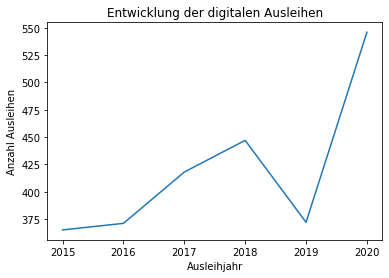

In [31]:
# als Diagramm über die Zeit
ts = pd.Series(Digi_Ausleihen, index=Ausleihjahre)
ts.plot()
plt.title("Entwicklung der digitalen Ausleihen")
plt.xlabel("Ausleihjahr")
plt.ylabel("Anzahl Ausleihen")
plt.show()

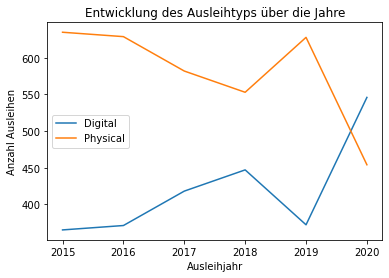

In [32]:
# beide in einem Diagramm darstellen
df.plot()
plt.title("Entwicklung des Ausleihtyps über die Jahre")
plt.xlabel("Ausleihjahr")
plt.ylabel("Anzahl Ausleihen")
plt.show()

## 4) Werden ältere Bücher weniger oft ausgeliehen?  
Es soll die Anzahl der Ausleihen nach Erscheinungsjahr betrachtet werden.

**Erster Schritt: Säuberung von Daten**  
Die Angabe des Publikationsjahres enthält Abweichungen von der Form "jjjj". Für eine weitere Analyse müssen alle überflüssigen Zeichen entfernt werden.

In [33]:
# es sollen alle Zeichen außer den 4 Zahlen (\D) des Publikationsjahres entfernt (replace) werden:
checkouts["publicationyear"] = checkouts['publicationyear'].str.replace(r'\D',"")
# außerdem sind teilweise zwei Jahre angegeben, hier soll nun nur das erste Jahr weiterverwendet werden:
checkouts["publicationyear"] = checkouts['publicationyear'].str[:4]

#checkouts["publicationyear"]

In [34]:
temp = checkouts[["publicationyear", "checkouts"]]
temp

,publicationyear,checkouts
0,2003,1
1,2008,1
2,2019,5
3,2012,1
4,2012,1
...,...,...
995,2017,22
996,2015,1
997,2017,1
998,2015,1


**Zweiter Schritt: Summierung der Ausleihen pro Publikationsjahr**

In [35]:
# Gruppieren nach Erscheinungsjahr und Summe pro Erscheinungsjahr
Ausleihen_nach_jahren = checkouts[["publicationyear", "checkouts"]].groupby(["publicationyear"]).sum()
Ausleihen_nach_jahren

,checkouts
publicationyear,
1915,1
1937,1
1952,1
1953,14
1956,1
1962,60
1966,1
1975,1
1977,2


**Dritter Schritt: Visualisierung**

*Überblick: Anzahl der Ausleihen pro Publikationsjahr*

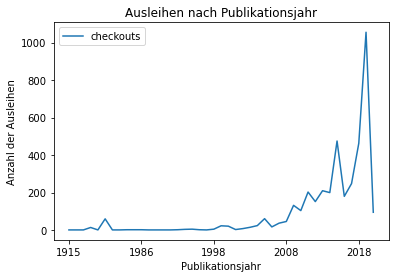

In [36]:
# Verteilung nach Publikationsjahren als x-y-Graph plotten
Ausleihen_nach_jahren.plot()
plt.title("Ausleihen nach Publikationsjahr")
plt.xlabel("Publikationsjahr")
plt.ylabel("Anzahl der Ausleihen")
plt.show()

*Wie häufig sind ausleihstarke Publikationsjahre?*

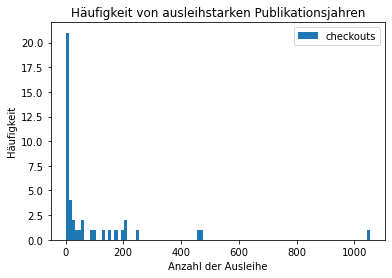

In [37]:
# Verteilung der Häufigkeit hoher Ausleihzahlen als Histogramm plotten
Ausleihen_nach_jahren.plot.hist(bins=100)
plt.title("Häufigkeit von ausleihstarken Publikationsjahren")
plt.xlabel("Anzahl der Ausleihe")
plt.ylabel("Häufigkeit")
plt.show()

# 5) Wie oft wurden im Jahr 2020 Medien von Astrid Lindgren ausgeliehen?

*Laden der Daten mit Ausleihjahr 2020:*

In [119]:
# Festlegung der URL mit Eingrenzung des Ausleihjahres und der Anzahl von Zeilen
checkout_url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2020&$limit=2000000"
checkouts_file = "checkouts.csv"
# Download der Daten
urllib.request.urlretrieve(checkout_url, checkouts_file)
# Überführung in ein Python-Objekt
checkouts = pd.read_csv(checkouts_file)

In [120]:
# Erstelle neues DataFrame, das nur die Spalten Autor und Auseihen enthält:
data_autor = {'Autor': checkouts["creator"],
        'Ausleihen': checkouts["checkouts"],
        }

df_autoren = pd.DataFrame(data_autor, columns = ['Autor', 'Ausleihen'])
df_autoren

,Autor,Ausleihen
0,"Inglis, Sam",1
1,Gene Roberts,1
2,Isa Chandra Moskowitz,5
3,Luanne Rice,1
4,Tami Dane,1
...,...,...
1721371,Robert McCloskey,4
1721372,"MacCarthy, Mariah",1
1721373,"Sklansky, Amy E.",2
1721374,"Clark, P. Djèlí",5


*Suche nach einem Autor - hier Astrid Lindgren*

In [147]:
# zunächst müssen NaN entfernt werden, da sonst die Suche nach einem Autor über "str.match" nicht funktioniert 
df_autoren = df_autoren[df_autoren["Autor"].notna()]

In [148]:
df_autoren

,Autor,Ausleihen
0,"Inglis, Sam",1
1,Gene Roberts,1
2,Isa Chandra Moskowitz,5
3,Luanne Rice,1
4,Tami Dane,1
...,...,...
1721369,Ali Wenzke,1
1721371,Robert McCloskey,4
1721372,"MacCarthy, Mariah",1
1721373,"Sklansky, Amy E.",2


In [149]:
# Suche in der Spalte Autor nach "Lindgren"
df[df["Autor"].str.match("Lindgren")]

,Autor,Ausleihen


Die Suche mit "match" ist zu streng, da die Angabe auch mit dem Vornamen beginnen kann, daher lieber "contains" verwenden:

In [153]:
df[df["Autor"].str.contains("Lindgren")]

,Autor,Ausleihen
200,Astrid Lindgren,1


Es gab tatsächlich nur eine Ausleihe mit Autorin "Astrid Lindgren". Wäre mehrer Titel von ihr entliehen worden, würden hier mehr Zeilen auftauchen und man müsste noch über die Anzahlen der Checkouts summieren oder aber nach Autor gruppieren (siehe unten).

*kleiner Exkurs - Wieviele Autoren haben mehr als 100 Ausleihen?*

In [124]:
# Gruppieren nach Autoren
Autoren = checkouts[["creator", "checkouts"]].groupby(["creator"]).sum()
Autoren

,checkouts
creator,
!!! (Musical group),15
'N Sync (Musical group),3
'Til Tuesday (Musical group),7
(法)凡尔纳,3
(美)凯瑟琳·瓦伦特,1
...,...
（法）卡罗琳•吉约,5
（美）梭罗,3
（美）珍娜·繆賽卡,2


In [125]:
Autoren[Autoren["checkouts"] >= 100]

,checkouts
creator,
A. A. Milne,442
A. I. Newton,129
A. J. Jacobs,116
A. J. Baime,112
A. J. Finn,1604
...,...
don Miguel Ruiz,428
emily m. danforth,197
"hooks, bell, 1952-",198
